# **Projekt MED**
### **Analiza zależność między wskaźnikami makroekonomicznymi, a stopą bezrobocia**
Na przykładzie danych z Polski w latach 2000-2020.

Źródło danych: https://stat.gov.pl/wskazniki-makroekonomiczne/

## 1. Wczytanie i wstępna obróbka danych

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

In [8]:
mwm = pd.read_excel('wybrane_miesieczne_wskazniki_makroekonomiczne_cz_i.xlsx', usecols="B:IU", sheet_name="WSKAZNIKI MIESIĘCZNE", skiprows=2, nrows=187, index_col=[0,1], na_values=["x","."]).T
mwm = mwm.apply(pd.to_numeric, errors='ignore')
mwm.head() 

Wyszczególnienie
A – analogiczny okres roku poprzedniego=100
B – okres poprzedni=100
C – grudzień roku poprzedniego=100
I2 – przeciętna miesięczna 2005=100 
I3 – przeciętna miesięczna 2010=100
I4 – przeciętna miesięczna 2015=100 Wyszczególnienie\nA – analogiczny okres roku poprzedniego=100\nB – okres poprzedni=100\nC – grudzień roku poprzedniego=100\nI2 – przeciętna miesięczna 2005=100 \nI3 – przeciętna miesięczna 2010=100\nI4 – przeciętna miesięczna 2015=100  \
                                                                                                                                                                                                                                                                                                                                                                                                                                                                            NaN   
2000                                                                                                                                                                                                                                                                                  I                                                                                                                                                                                           
Unnamed: 4                                                                                                                                                                                                                                                                           II                                                                                                                                                                                           
Unnamed: 5                                                                                                                                                                                                                                                                          III                                                                                                                                                                                           
Unnamed: 6                                                                                                                                                                                                                                                                           IV                                                                                                                                                                                           
Unnamed: 7                                                                                                                                                                                                                                                                            V                                                                                                                                                                                           

Wyszczególnienie
A – analogiczny okres roku poprzedniego=100
B – okres poprzedni=100
C – grudzień roku poprzedniego=100
I2 – przeciętna miesięczna 2005=100 
I3 – przeciętna miesięczna 2010=100
I4 – przeciętna miesięczna 2015=100 Przeciętne zatrudnienie w sektorze przedsiębiorstwa  \
                                                                                                                                                                                                                                                                                  w tys.   
2000                                                                                                                                                              

In [9]:
# wczytanie danych
mwm = pd.read_excel('wybrane_miesieczne_wskazniki_makroekonomiczne_cz_i.xlsx', usecols="B:IU", sheet_name="WSKAZNIKI MIESIĘCZNE", skiprows=2, nrows=187, index_col=[0,1], na_values=["x","."]).T
mwm = mwm.apply(pd.to_numeric, errors='ignore')
mwm.head()

Wyszczególnienie
A – analogiczny okres roku poprzedniego=100
B – okres poprzedni=100
C – grudzień roku poprzedniego=100
I2 – przeciętna miesięczna 2005=100 
I3 – przeciętna miesięczna 2010=100
I4 – przeciętna miesięczna 2015=100 Wyszczególnienie\nA – analogiczny okres roku poprzedniego=100\nB – okres poprzedni=100\nC – grudzień roku poprzedniego=100\nI2 – przeciętna miesięczna 2005=100 \nI3 – przeciętna miesięczna 2010=100\nI4 – przeciętna miesięczna 2015=100  \
                                                                                                                                                                                                                                                                                                                                                                                                                                                                            NaN   
2000                                                                                                                                                                                                                                                                                  I                                                                                                                                                                                           
Unnamed: 4                                                                                                                                                                                                                                                                           II                                                                                                                                                                                           
Unnamed: 5                                                                                                                                                                                                                                                                          III                                                                                                                                                                                           
Unnamed: 6                                                                                                                                                                                                                                                                           IV                                                                                                                                                                                           
Unnamed: 7                                                                                                                                                                                                                                                                            V                                                                                                                                                                                           

Wyszczególnienie
A – analogiczny okres roku poprzedniego=100
B – okres poprzedni=100
C – grudzień roku poprzedniego=100
I2 – przeciętna miesięczna 2005=100 
I3 – przeciętna miesięczna 2010=100
I4 – przeciętna miesięczna 2015=100 Przeciętne zatrudnienie w sektorze przedsiębiorstwa  \
                                                                                                                                                                                                                                                                                  w tys.   
2000                                                                                                                                                              

In [10]:
# postać danych
mwm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2000 to Unnamed: 254
Columns: 187 entries, ('Wyszczególnienie\nA – analogiczny okres roku poprzedniego=100\nB – okres poprzedni=100\nC – grudzień roku poprzedniego=100\nI2 – przeciętna miesięczna 2005=100 \nI3 – przeciętna miesięczna 2010=100\nI4 – przeciętna miesięczna 2015=100', nan) to ('obsługa rynku nieruchomości∆', nan)
dtypes: float64(186), object(1)
memory usage: 370.1+ KB


Wstępnie nasze dane posiadają 252 rekordy oraz 187 atrybutów.

In [11]:
# ustawienie indeksu
mwm = mwm.reset_index()
arrays = [sorted(list(range(2000,2021))*12), mwm.iloc[:,1]]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['rok', 'miesiac'])
mwm = mwm.set_index(index).drop(mwm.columns[0:2], axis=1)
mwm.index

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


MultiIndex([(2000,    'I'),
            (2000,   'II'),
            (2000,  'III'),
            (2000,   'IV'),
            (2000,    'V'),
            (2000,   'VI'),
            (2000,  'VII'),
            (2000, 'VIII'),
            (2000,   'IX'),
            (2000,    'X'),
            ...
            (2020,  'III'),
            (2020,   'IV'),
            (2020,    'V'),
            (2020,   'VI'),
            (2020,  'VII'),
            (2020, 'VIII'),
            (2020,   'IX'),
            (2020,    'X'),
            (2020,   'XI'),
            (2020,  'XII')],
           names=['rok', 'miesiac'], length=252)

Jako, że przedwidywaną wartością jest stopa bezrobocia, usuwamy kolumny bezpośrednio z nią powiązane:
* *Przeciętne zatrudnienie w sektorze przedsiębiorstwa*
* *Bezrobotni zarejestrowani (stan w końcu okresu)*

Wyrzucamy kolumny poziomu 0:
1. Bezpośrednio związane ze stopą bezrobocia:
  * *Przeciętne zatrudnienie w sektorze przedsiębiorstwa*
  * *Bezrobotni zarejestrowani (stan w końcu okresu)*
2. Służące do opisu innych kolumn i nieposiadające danych:
  * *Produkcja sprzedana przemysłu według głównych grupowań przemysłowycha,e,f (ceny stałe)* 
  * *Wskaźnik ogólnego klimatu koniunktury gospodarczeje:*

In [12]:
# wyrzucenie kolumn poziomu 0
mwm = mwm.drop(columns=["Przeciętne zatrudnienie w sektorze przedsiębiorstwa", 
                        "Bezrobotni zarejestrowani (stan w końcu okresu)", 
                        "Produkcja sprzedana przemysłu według głównych grupowań przemysłowycha,e,f (ceny stałe)",
                        'Wskaźnik ogólnego klimatu koniunktury gospodarczeje:'
                      ], level=0)

Większość kolumn poziomu 1 jest wartościami względnymi:
* A – analogiczny okres roku poprzedniego=100
* B – okres poprzedni=100
* C – grudzień roku poprzedniego=100
* I2 – przeciętna miesięczna 2005=100 
* I3 – przeciętna miesięczna 2010=100
* I4 – przeciętna miesięczna 2015=100

Wartości I2, I3 i I4 jest znacznie mniej w danych, więc od razu je odrzucamy.

Kolumny A i B z punktu widzenia naszego problemu sa bardzo podobne. Jednak dane A mają tę przewagę nad B, że nie zależą od pory roku, której nie zamierzamy analizować, ani uwzględniać w modelu.
Do dalszej analizy wybierzemy zatem **jedynie kolumny A**, które odnoszą się do analogicznego okresu roku (czyli poprzedniego miesiąca). Również kolumn A jest więcej.

Aby moć poprawnie przewidywać wartość stopy bezrobocia na podstawie danych określających zmianę względem poprzedniego okresu, w dalszym etapie wprowadzimy nowy atrybut - **stopa bezrobocia analogicznego okresu poprzedniego roku**. 

In [13]:
# wyrzucenie kolumn poziomu 1
mwm.drop(['B', 'C', 'I2', 'I3', ' I3g', 'I3g', 'I4'], axis=1, level=1, inplace = True)

In [14]:
# zmiana nazw kolumn poziomu 0 
mwm.rename(columns = {
        'Dochody budżetu państwac \n(od początku roku do końca okresu)': 'dochody_pk',
        'Eksport towarówk (ceny bieżące)': 'eksport_biez',
        'Eksport towarówk (ceny stałe)': 'eksport_stal',
        'Import towarówk (ceny bieżące)': 'import_biez',
        'Import towarówk (ceny stałe)': 'import_stal',
        'Mieszkania oddane do użytkowania ': 'mieszkania',
        'Nowe zamówienia w przemyśleh (ceny bieżące)': 'zamow_przem',
        'Obroty w handlu detalicznyme,i,j': 'obroty_hand',
        'Produkcja budowlano-montażowaa,e,f (ceny stałe)': 'prod_bud_mon',
        'Produkcja sprzedana przemysłu ogółema,e,f (ceny stałe)': 'prod_sprzed_og',
  
        'Przeciętna miesięczna nominalna emerytura i renta brutto z pozarolniczego systemu ubezpieczeń społecznych ': 'emer_pozarol_nom',
        'Przeciętna miesięczna nominalna emerytura i renta rolników indywidualnych brutto': 'emer_rol_nom',
        'Przeciętna miesięczna realna emerytura i renta brutto z pozarolniczego systemu ubezpieczeń społecznych ': 'emer_pozarol_real',
        'Przeciętna miesięczna realna emerytura i renta rolników indywidualnych brutto': 'emer_rol_real',
        'Przeciętne miesięczne nominalne wynagrodzenie brutto w sektorze przedsiębiorstwa': 'wyn_nom',
        'Przeciętne miesięczne realne wynagrodzenie brutto \nw sektorze przedsiębiorstwa': 'wyn_real',

        'Przeciętne zatrudnienie w sektorze przedsiębiorstwa': 'zatr',
        'Przewozy ładunków w transporcie kolejowym ': 'przew_kolej',
        "Przewozy ładunków w transporcie kolejowym\n(od początku roku do końca okresu)": "przew_kolej_pk",
        'Relacje cen skupu żywca wieprzowego do cen żyta na targowiskach': 'skup_wieprz_zyt',
        'Saldo obrotów towarowych handlu zagranicznegok ogółem': 'sald_hand_zagr',
        'Sprzedaż detaliczna towarówa (ceny stałe)': 'sprzed_det_stal',
        'Stopa bezrobocia rejestrowanegob (stan w końcu okresu)': 'stop_bezrob',
        
        'Wskaźniki cen produkcji budowlano-montażowej': 'cen_prod_bud_mon',
        'Wskaźniki cen produkcji sprzedanej w przemyśle': 'cen_prod_sprzed',
        'Wskaźniki cen skupu bydła (bez cieląt)': 'cen_byd',
        'Wskaźniki cen skupu mleka': 'cen_mlek',
        'Wskaźniki cen skupu pszenicy (bez ziarna siewnego)': 'cen_pszen',
        'Wskaźniki cen skupu trzody chlewnej': 'cen_trzod',
        'Wskaźniki cen skupu żyta (bez ziarna siewnego)': 'cen_zyt',
        'Wskaźniki cen towarów i usług konsumpcyjnych': 'cen_tow_us',
        'Wskaźniki cen usług telekomunikacjid': 'cen_telek',
        'Wskaźniki cen usług transportu i gospodarki magazynowejd': 'cen_trans_mag',
        'Wskaźniki cen transakcyjnych eksportu': 'cen_trans_exp',
        'Wskaźniki cen transakcyjnych importu': 'cen_trans_imp',
        'Terms of trade' : 'term_trade',

        'Wydatki budżetu państwac \n(od początku roku do końca okresu)': 'wyd_budzet',
        'Wynik (saldo) budżetu państwac \n(od początku roku do końca okresu)': 'saldo_budzet',
        'Wyprzedzający wskaźnik ufności konsumenckiej (WWUK)': 'wwuk',
        'Bieżący wskaźnik ufności konsumenckiej (BWUK)': 'bwuk',

      # Produkcja sprzedana przemysłu według głównych grupowań przemysłowycha,e,f (ceny stałe):
        'dobra inwestycyjne': 'prod_sprzed_inwest', 
        'dobra konsumpcyjne nietrwałe': 'prod_sprzed_kon_nietrw',
        'dobra konsumpcyjne trwałe': 'prod_sprzed_kon_trw',
        'dobra zaopatrzeniowe': 'prod_sprzed_zaop',
        'dobra związane z energią': 'prod_sprzed_energ',

      # Produkcja sprzedana przemysłu ogółema,e,f (ceny stałe):
        'dostawa wody; gospodarowanie ściekami i odpadami; rekultywacja∆': 'prod_sprzed_odpad', 
        'górnictwo i wydobywanie ': 'prod_sprzed_gor_wydob',
        'przetwórstwo przemysłowe': 'prod_sprzed_przetw',
        'wytwarzanie i zaopatrywanie w energię elektryczną, gaz, parę wodną i gorącą wodę∆': 'prod_sprzed_energ_2',

      # Wskaźnik ogólnego klimatu koniunktury gospodarczeje:
        'budownictwo': 'klim_kon_bud', 
        'działalność finansowa i ubezpieczeniowa': 'klim_kon_fin_ub',
        'handel; naprawa pojazdów samochodowych∆,l': 'klim_kon_hand_sam',
        'transport i gospodarka magazynowa': 'klim_kon_trans_mag',
        'zakwaterowanie i gastronomia∆': 'klim_kon_zakw_gast',
        'obsługa rynku nieruchomości∆': 'klim_kon_nieruchom',

      # Wskaźniki cen towarów i usług konsumpcyjnych
        'edukacja': 'cen_edu',
        'napoje alkoholowe i wyroby tytoniowe': 'cen_alko_tyt',
        'odzież i obuwie': 'cen_odziez',
        'rekreacja i kultura': 'cen_rekr_kult',
        'transport': 'cen_trans',
        'użytkowanie mieszkania lub domu i nośniki energii': 'cen_uz_mieszk',
        'wyposażenie mieszkania i prowadzenie gospodarstwa domowego': 'cen_wypos_mieszk',
        'zdrowie': 'cen_zdrowie',
        'łączność': 'cen_lacznosc',
        'żywność i napoje bezalkoholowe': 'cen_zywnosc',

      # Wskaźniki cen produkcji sprzedanej w przemyśle
        'w dostawie wody; gospodarowaniu ściekami\ni odpadami; rekultywacji∆': 'cen_prod_dost_wod',
        'w górnictwie i wydobywaniu': 'cen_prod_gor_wydob',
        'w przetwórstwie przemysłowym': 'cen_prod_przetw',
        'w wytwarzaniu i zaopatrywaniu w energię elektryczną, gaz, parę wodną i gorącą wodę∆': 'cen_prod_energ',
}, level = 0, inplace = True )

mwm.columns.set_names([None, None], inplace = True)

In [15]:
# nadanie nazw kolumnom z NaN z poziomu 1
mwm.columns.values[1] = ('stop_bezrob', '%')
mwm.rename(columns = {('stop_bezrob', np.nan):('stop_bezrob', '%')}, inplace=True)
mwm.drop(columns=('stop_bezrob', 'w %'), inplace = True)

mwm.columns.values[mwm.columns.tolist().index(('skup_wieprz_zyt', np.nan))] = ('skup_wieprz_zyt', 'prop')
mwm.rename(columns = {('skup_wieprz_zyt', np.nan):('skup_wieprz_zyt', 'prop')}, inplace=True)

mwm.columns.values[mwm.columns.tolist().index(('bwuk', np.nan))] = ('bwuk', 'x')
mwm.rename(columns = {('bwuk', np.nan):('bwuk', 'x')}, inplace=True)

mwm.columns.values[mwm.columns.tolist().index(('wwuk', np.nan))] = ('wwuk', 'x')
mwm.rename(columns = {('wwuk', np.nan):('wwuk', 'x')}, inplace=True)

mwm.columns.values[mwm.columns.tolist().index(('prod_sprzed_przetw', np.nan))] = ('prod_sprzed_przetw', 'x')
mwm.rename(columns = {('prod_sprzed_przetw', np.nan):('prod_sprzed_przetw', 'x')}, inplace=True)

mwm.columns.values[mwm.columns.tolist().index(('klim_kon_bud', np.nan))] = ('klim_kon_bud', 'x')
mwm.rename(columns = {('klim_kon_bud', np.nan):('klim_kon_bud', 'x')}, inplace=True)

mwm.columns.values[mwm.columns.tolist().index(('klim_kon_hand_sam', np.nan))] = ('klim_kon_hand_sam', 'x')
mwm.rename(columns = {('klim_kon_hand_sam', np.nan):('klim_kon_hand_sam', 'x')}, inplace=True)

mwm.columns.values[mwm.columns.tolist().index(('klim_kon_trans_mag', np.nan))] = ('klim_kon_trans_mag', 'x')
mwm.rename(columns = {('klim_kon_trans_mag', np.nan):('klim_kon_trans_mag', 'x')}, inplace=True)

mwm.columns.values[mwm.columns.tolist().index(('klim_kon_zakw_gast', np.nan))] = ('klim_kon_zakw_gast', 'x')
mwm.rename(columns = {('klim_kon_zakw_gast', np.nan):('klim_kon_zakw_gast', 'x')}, inplace=True)

mwm.columns.values[mwm.columns.tolist().index(('klim_kon_fin_ub', np.nan))] = ('klim_kon_fin_ub', 'x')
mwm.rename(columns = {('klim_kon_fin_ub', np.nan):('klim_kon_fin_ub', 'x')}, inplace=True)

mwm.columns.values[mwm.columns.tolist().index(('klim_kon_nieruchom', np.nan))] = ('klim_kon_nieruchom', 'x')
mwm.rename(columns = {('klim_kon_nieruchom', np.nan):('klim_kon_nieruchom', 'x')}, inplace=True)
mwm.drop(columns=('klim_kon_nieruchom', np.nan), inplace = True)

In [16]:
# zmiana nazw kolumn poziomu 1
mwm.rename(
    columns = {
        "A" : "%_poprz",
        "w %": "%",
        "w zł": "zl",
        "w mln zł": "mln_zl",
        "w szt.": "szt",
        "w mln tonokilometrów": "mln_tkm"
}, level = 1, inplace = True )

In [17]:
# kolumny po przetworzeniu
mwm.columns, len(mwm.columns)

(MultiIndex([(           'stop_bezrob',       '%'),
             (               'wyn_nom',      'zl'),
             (               'wyn_nom', '%_poprz'),
             (              'wyn_real', '%_poprz'),
             (      'emer_pozarol_nom',      'zl'),
             (      'emer_pozarol_nom', '%_poprz'),
             (     'emer_pozarol_real', '%_poprz'),
             (          'emer_rol_nom',      'zl'),
             (          'emer_rol_nom', '%_poprz'),
             (         'emer_rol_real', '%_poprz'),
             (            'dochody_pk',  'mln_zl'),
             (            'wyd_budzet',  'mln_zl'),
             (          'saldo_budzet',  'mln_zl'),
             (             'cen_pszen', '%_poprz'),
             (               'cen_zyt', '%_poprz'),
             (               'cen_byd', '%_poprz'),
             (             'cen_trzod', '%_poprz'),
             (              'cen_mlek', '%_poprz'),
             (       'skup_wieprz_zyt',    'prop'),
            

Ograliczyliśmy liczbę kolumn z 187 do 74.

In [18]:
# gotowa postać danych do analizy
mwm.head()

stop_bezrob wyn_nom         wyn_real emer_pozarol_nom          \
                       %      zl %_poprz  %_poprz               zl %_poprz   
rok  miesiac                                                                 
2000 I              13.7     NaN     NaN      NaN           847.59   110.7   
     II             14.0     NaN     NaN      NaN           849.92   110.3   
     III            14.0     NaN     NaN      NaN           851.97   110.2   
     IV             13.8     NaN     NaN      NaN           850.93   110.2   
     V              13.6     NaN     NaN      NaN           851.25   110.2   

             emer_pozarol_real emer_rol_nom         emer_rol_real  ...  \
                       %_poprz           zl %_poprz       %_poprz  ...   
rok  miesiac                                                       ...   
2000 I                   100.8       595.43   109.3          99.5  ...   
     II                  100.1       579.42   109.7          99.5  ...   
     III                 100.2       580.50   110.0         100.0  ...   
     IV                  100.5       595.81   109.1          99.5  ...   
     V                   100.3       580.94   109.8          99.9  ...   

             sald_hand_zagr  bwuk  wwuk prod_sprzed_przetw klim_kon_bud  \
                     mln_zl     x     x                  x            x   
rok  miesiac                                                              
2000 I              -5099.5 -32.9 -45.0               -1.6        -25.1   
     II             -5704.2   NaN   NaN                1.9          4.0   
     III            -6656.0   NaN   NaN                3.1         22.2   
     IV             -5974.9 -33.5 -45.2                2.8         30.5   
     V              -8262.9   NaN   NaN                0.7         28.1   

             klim_kon_hand_sam klim_kon_trans_mag klim_kon_zakw_gast  \
                             x                  x                  x   
rok  miesiac                                                           
2000 I                   -17.6                NaN                NaN   
     II                   -9.0                NaN                NaN   
     III                  -2.8                NaN                NaN   
     IV                    0.7                NaN                NaN   
     V                    -5.7                NaN                NaN   

             klim_kon_fin_ub klim_kon_nieruchom  
                           x                  x  
rok  miesiac                                     
2000 I                   NaN                NaN  
     II                  NaN                NaN  
     III                 NaN                NaN  
     IV                  NaN                NaN  
     V                   NaN                NaN  

[5 rows x 74 columns]

## 2. Eksploracyjna Analiza Danych

### 2.1. Zakres i stopień zmienności atrybutów

In [19]:
pd.set_option('display.max_rows', 300)
mwm.describe().T

count           mean           std  \
stop_bezrob            %        250.0      12.553200      4.318552   
wyn_nom                zl       191.0    3824.358956    829.660769   
                       %_poprz  179.0     105.253631      2.526139   
wyn_real               %_poprz  179.0     103.274216      2.464055   
emer_pozarol_nom       zl       250.0    1621.337400    476.150587   
                       %_poprz  250.0     105.448800      3.157972   
emer_pozarol_real      %_poprz  250.0     102.484800      2.894159   
emer_rol_nom           zl       250.0     964.150200    223.318474   
                       %_poprz  250.0     104.415600      3.859214   
emer_rol_real          %_poprz  250.0     101.478800      3.511746   
dochody_pk             mln_zl   249.0  134090.840683  86843.929336   
wyd_budzet             mln_zl   249.0  149892.382771  90650.463258   
saldo_budzet           mln_zl   249.0  -15801.540843  12643.109129   
cen_pszen              %_poprz  250.0     106.411048     29.273289   
cen_zyt                %_poprz  250.0     108.382491     35.566733   
cen_byd                %_poprz  250.0     105.102772     13.326990   
cen_trzod              %_poprz  250.0     104.530466     18.634940   
cen_mlek               %_poprz  250.0     105.044467     14.467319   
skup_wieprz_zyt        prop     247.0       8.118735      1.844299   
cen_prod_sprzed        %_poprz  179.0     101.555866      2.750098   
cen_prod_gor_wydob     %_poprz  179.0     105.688268     10.412656   
cen_prod_przetw        %_poprz  179.0     100.963687      2.758169   
cen_prod_energ         %_poprz  179.0     103.629050      4.651669   
cen_prod_dost_wod      %_poprz  179.0     103.700000      2.361869   
cen_prod_bud_mon       %_poprz  179.0     101.481006      2.536847   
cen_trans_mag          %_poprz  156.0     103.185256      1.840750   
cen_telek              %_poprz  156.0      95.891026      2.637897   
cen_tow_us             %_poprz  251.0     102.592342      2.426839   
cen_zywnosc            %_poprz  251.0     103.200577      3.339332   
cen_alko_tyt           %_poprz  251.0     103.280728      2.767275   
cen_odziez             %_poprz  251.0      96.404230      3.083155   
cen_uz_mieszk          %_poprz  251.0     104.597214      3.275203   
cen_wypos_mieszk       %_poprz  251.0     101.374251      1.422576   
cen_zdrowie            %_poprz  251.0     103.012298      2.431480   
cen_trans              %_poprz  251.0     102.330864      6.730389   
cen_lacznosc           %_poprz  251.0      99.982806      3.271798   
cen_rekr_kult          %_poprz  251.0     101.645517      2.589343   
cen_edu                %_poprz  251.0     102.923880      3.206067   
cen_trans_exp          %_poprz  249.0     102.589157      5.747258   
cen_trans_imp          %_poprz  249.0     102.053414      6.050433   
term_trade             %_poprz  249.0     100.622088      3.941103   
prod_sprzed_og         %_poprz  179.0     104.601492      6.207958   
prod_sprzed_gor_wydob  %_poprz  179.0      97.911855      7.370921   
prod_sprzed_przetw     %_poprz  179.0     105.402095      6.909768   
prod_sprzed_energ_2    %_poprz  179.0     100.393475      6.466419   
prod_sprzed_odpad      %_poprz  179.0     104.352268      3.627263   
prod_sprzed_zaop       %_poprz  179.0     105.484916      7.918918   
prod_sprzed_inwest     %_poprz  179.0     106.141341     10.649881   
prod_sprzed_kon_trw    %_poprz  179.0     108.854190     12.789116   
prod_sprzed_kon_nietrw %_poprz  179.0     104.474302      4.762224   
prod_sprzed_energ      %_poprz  179.0      99.787151      5.739955   
zamow_przem            %_poprz  179.0     109.427933     21.375729   
prod_bud_mon           %_poprz  190.0     105.899753     13.767162   
mieszkania             szt      250.0   12066.988000   4310.688891   
sprzed_det_stal        %_poprz  169.0     105.420710      5.135635   
obroty_hand            %_poprz  169.0     104.618935      4.462409   
przew_kolej            mln_tkm  119.0    4

* Wskaźniki ogólnego klimatu koniunktury gospodarczej* oraz salda (budżet i handel zagraniczny) przyjmują wartości wokół 0 - salda mają jednak znacznie większy zakres 
* Większość wskaźników przyjmuje wartości w okolicach 100, gdyż wyrażają procentową zmianę względem poprzedniego okresu 
* BWUK i WWUK przyjmują tylko wartości ujemne. Oznacza to, że zawsze więcej jest konsumentów nastawionych pesymistycznie.
* Pod względem zakresu i zmienności atrybuty możemy podzielić na wskaźniki i konkretne wartości (głównie pieniężne)  


*Wskaźniki ogólnego klimatu koniunktury gospodarczej liczone są jako średnia arytmetyczna sald odpowiedzi na pytania z ankiety miesięcznej dotyczące bieżącej i przewidywanej sytuacji gospodarczej przedsiębiorstwa.*

*BWUK i WWUK - obydwa wskaźniki ufności konsumenckiej mogą przyjmować wartości od –100 do +100. Wartość dodatnia oznacza przewagę liczebną konsumentów nastawionych optymistycznie nad konsumentami nastawionymi pesymistycznie, natomiast wartość ujemna oznacza przewagę liczebną konsumentów nastawionych pesymistycznie nad konsumentami nastawionymi optymistycznie.*

### 2.2. Stopień wypełnienia danych

In [20]:
# poziom wypełnienia kolumn
mwm.count() / len(mwm)

stop_bezrob             %          0.992063
wyn_nom                 zl         0.757937
                        %_poprz    0.710317
wyn_real                %_poprz    0.710317
emer_pozarol_nom        zl         0.992063
                        %_poprz    0.992063
emer_pozarol_real       %_poprz    0.992063
emer_rol_nom            zl         0.992063
                        %_poprz    0.992063
emer_rol_real           %_poprz    0.992063
dochody_pk              mln_zl     0.988095
wyd_budzet              mln_zl     0.988095
saldo_budzet            mln_zl     0.988095
cen_pszen               %_poprz    0.992063
cen_zyt                 %_poprz    0.992063
cen_byd                 %_poprz    0.992063
cen_trzod               %_poprz    0.992063
cen_mlek                %_poprz    0.992063
skup_wieprz_zyt         prop       0.980159
cen_prod_sprzed         %_poprz    0.710317
cen_prod_gor_wydob      %_poprz    0.710317
cen_prod_przetw         %_poprz    0.710317
cen_prod_energ          %_poprz 

Kolumny *przew_kolej* oraz *przew_kolej_pk*, dotyczące przewozu ładunków w transporcie kolejowym, mają bardzo niskie wypełnienie (< 50%). Większość kolumn ma jednak wypełnienie powyżej 70%.

In [21]:
# procent kolumn z wypełnieniem powyżej progu
t = 0.7 
(mwm.count() / len(mwm) > t).sum() / len(mwm.columns)

0.8918918918918919

Prawie 90% kolumn ma wypełnienie powyżej 70%.

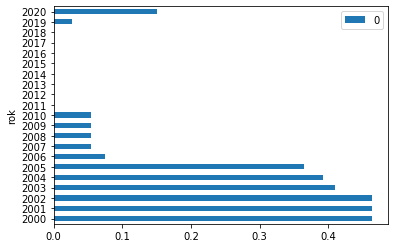

In [22]:
# średni poziom wypełnienia rekordów dla każdego roku
pd.DataFrame(mwm.isna().sum(axis=1).groupby("rok").mean() / len(mwm.columns)).plot.barh()

Rekordy z pierwszych 6 lat mają ponad 35% brakujących danych.

In [23]:
# wypełnienie ostatniego roku (2020)
mwm.loc[mwm.index.get_level_values('rok') == 2020].isna().sum(axis=1) / len(mwm.columns) 

rok   miesiac
2020  I          0.027027
      II         0.027027
      III        0.027027
      IV         0.040541
      V          0.040541
      VI         0.040541
      VII        0.027027
      VIII       0.027027
      IX         0.027027
      X          0.135135
      XI         0.405405
      XII        0.972973
dtype: float64

Dane z ostatnich 2 miesięcy są mocno niepełne.

### 2.3. Korelacja danych

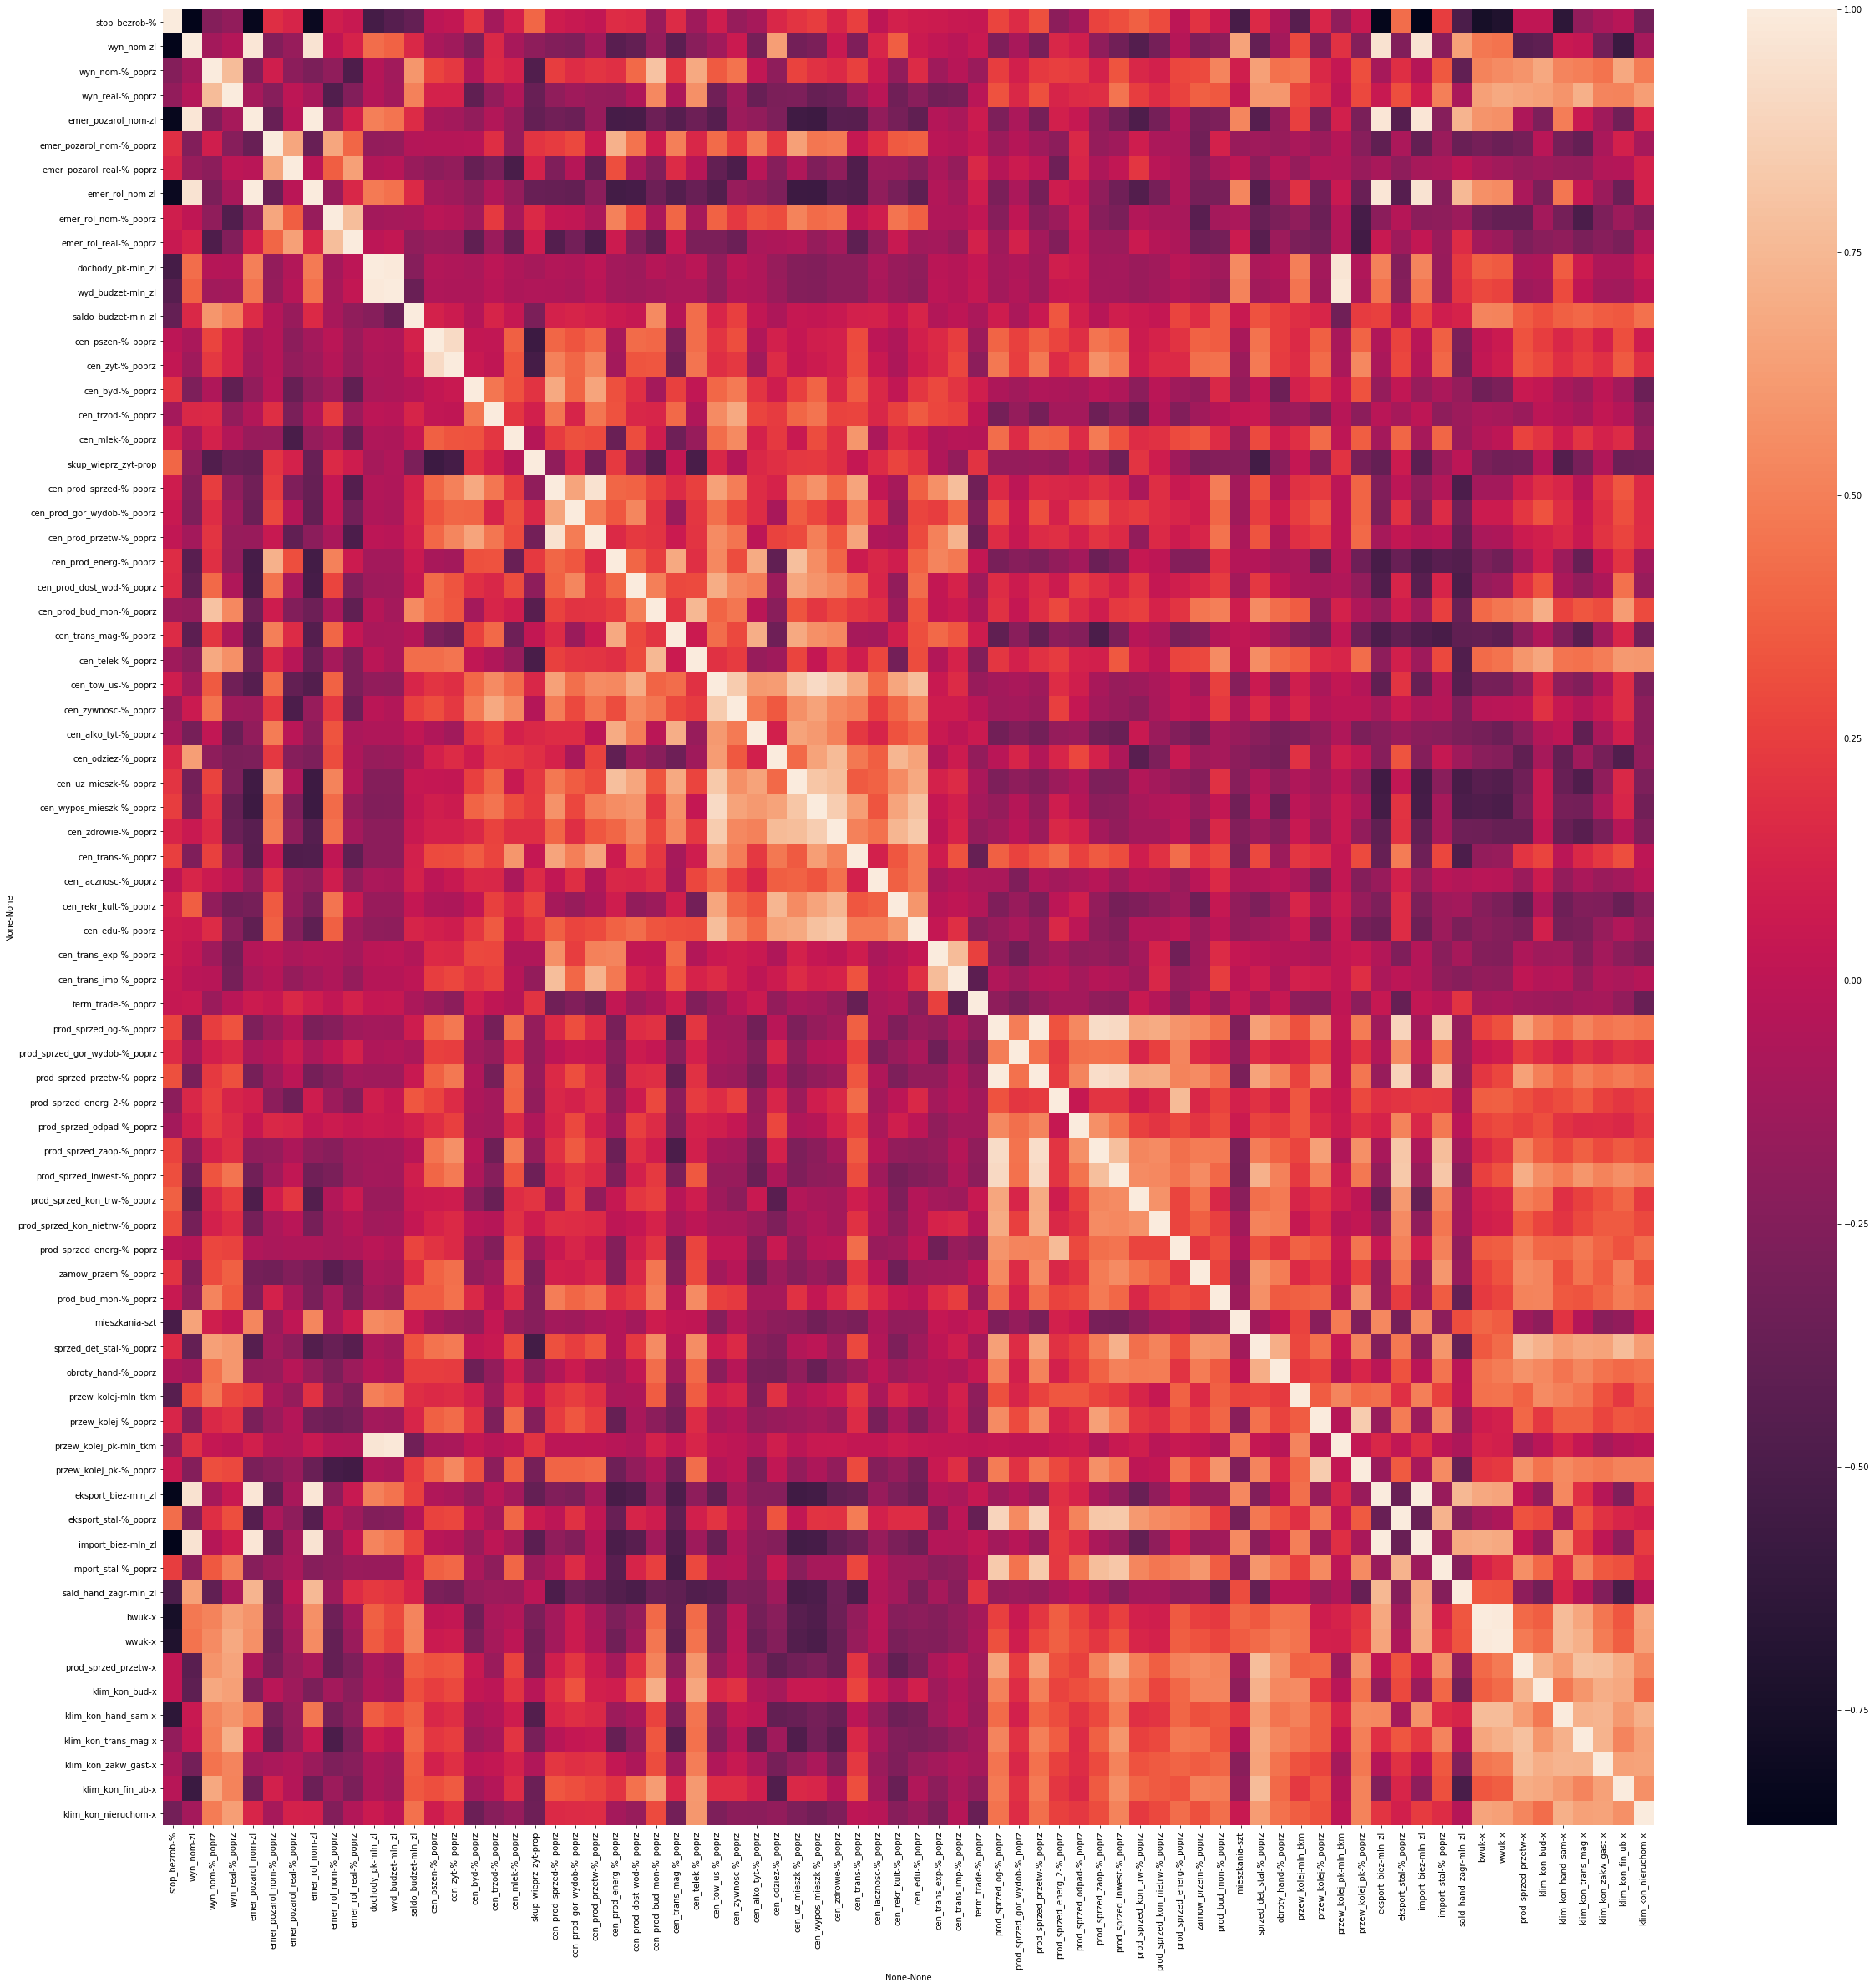

In [24]:
# korelacja atrybutów - mapa ciepła
fig, ax = plt.subplots(figsize=(40,40))         
sns.heatmap(mwm.corr(), ax = ax)

Na wykresie możemy zauważyć mocniejszą korelację między konkretnymi kategoriami atrybutów (jaśniejsze skupiska):
* Wskaźniki ogólnego klimatu koniunktury gospodarczej
* Wskaźniki cen towarów i usług konsumpcyjnych

Będziemy rozważać zespolenie tych grup atrybutów.

Możemy również zauważyć, że kolumny dotyczące produkcji i sprzedaży mają silniejszą korelację ze sobą niż pozostałe pary.

In [25]:
# najmocniej skorelowane pary atrybutów

thr = 0.9 # próg 
print("Pary atrybutów ze wspołczynnikiem korelacji powyżej: " + str(thr))

corr = mwm.corr()
it = 0
for i in range(0,len(corr)):
    for j in range(i,len(corr)):
        if(i != j and corr.iloc[i,j] > thr):
            it += 1
        print(it, mwm.columns[i],mwm.columns[j], corr.iloc[i,j])


Pary atrybutów ze wspołczynnikiem korelacji powyżej: 0.9
1 ('wyn_nom', 'zl') ('emer_pozarol_nom', 'zl') 0.9721008905581581
2 ('wyn_nom', 'zl') ('emer_rol_nom', 'zl') 0.9611473691280713
3 ('wyn_nom', 'zl') ('eksport_biez', 'mln_zl') 0.9532603999075787
4 ('wyn_nom', 'zl') ('import_biez', 'mln_zl') 0.9563619923199114
5 ('emer_pozarol_nom', 'zl') ('emer_rol_nom', 'zl') 0.9960324878644486
6 ('emer_pozarol_nom', 'zl') ('eksport_biez', 'mln_zl') 0.9759204564367924
7 ('emer_pozarol_nom', 'zl') ('import_biez', 'mln_zl') 0.9712860863964585
8 ('emer_rol_nom', 'zl') ('eksport_biez', 'mln_zl') 0.9718814546913243
9 ('emer_rol_nom', 'zl') ('import_biez', 'mln_zl') 0.9633721236701086
10 ('dochody_pk', 'mln_zl') ('wyd_budzet', 'mln_zl') 0.9907678901888864
11 ('dochody_pk', 'mln_zl') ('przew_kolej_pk', 'mln_tkm') 0.969704860476441
12 ('wyd_budzet', 'mln_zl') ('przew_kolej_pk', 'mln_tkm') 0.9784279862089782
13 ('cen_pszen', '%_poprz') ('cen_zyt', '%_poprz') 0.9169992613658899
14 ('cen_prod_sprzed', '%_po

22 pary atrybutów w naszych danych ma bardzo silną korelację (powyżej 0.9).

## 3. Opracowanie modelu regresji


### 3.0. Utworzenie nowych atrybutów

Utworzymy wspomniany wcześniej atrybut, będący stopą bezrobocia z poprzedniego okresu. Jako, że większość atrybutów w naszych danych opisuje procentową zmianę względem poprzedniego okresu i mamy zamiar przewidywać stopę bezrobocia, atrybut ten jest niezbędeny do poprawnego funkcjonowania tworzonego modelu.

In [26]:
sb_poprz = mwm['stop_bezrob','%'].values
sb_poprz = sb_poprz[:-12]

# wartości dla pierwszego roku nie mają znaczenia, bo i tak usuniemy te rekordy
sb_poprz = np.zeros(12).tolist() + sb_poprz.tolist()

mwm['stop_bezrob_poprz', 'w %'] = sb_poprz
mwm['stop_bezrob_poprz']

w %
rok  miesiac      
2000 I         0.0
     II        0.0
     III       0.0
     IV        0.0
     V         0.0
     VI        0.0
     VII       0.0
     VIII      0.0
     IX        0.0
     X         0.0
     XI        0.0
     XII       0.0
2001 I        13.7
     II       14.0
     III      14.0
     IV       13.8
     V        13.6
     VI       13.6
     VII      13.8
     VIII     13.9
     IX       14.0
     X        14.1
     XI       14.5
     XII      15.1
2002 I        15.7
     II       15.9
     III      16.1
     IV       16.0
     V        15.9
     VI       15.9
     VII      16.0
     VIII     16.2
     IX       16.3
     X        16.4
     XI       16.8
     XII      17.5
2003 I        18.1
     II       18.2
     III      18.2
     IV       17.9
     V        17.3
     VI       17.4
     VII      17.5
     VIII     17.5
     IX       17.6
     X        17.5
     XI       17.8
     XII      18.0
2004 I        20.6
     II       20.7
     III      20.6
     IV       20.3
     V        19.8
     VI       19.7
     VII      19.6
     VIII     19.5
     IX       19.4
     X        19.3
     XI       19.5
     XII      20.0
2005 I        20.6
     II       20.6
     III      20.4
     IV       19.9
     V        19.5
     VI       19.4
     VII      19.3
     VIII     19.1
     IX       18.9
     X        18.7
     XI       18.7
     XII      19.0
2006 I        19.4
     II       19.4
     III      19.2
     IV       18.7
     V        18.2
     VI       18.0
     VII      17.9
     VIII     17.7
     IX       17.6
     X        17.3
     XI       17.3
     XII      17.6
2007 I        18.0
     II       18.0
     III      17.8
     IV       17.2
     V        16.5
     VI       15.9
     VII      15.7
     VIII     15.5
     IX       15.2
     X        14.9
     XI       14.8
     XII      14.8
2008 I        15.1
     II       14.8
     III      14.3
     IV       13.6
     V        12.9
     VI       12.3
     VII      12.1
     VIII     11.9
     IX       11.6
     X        11.3
     XI       11.2
     XII      11.2
2009 I        11.5
     II       11.3
     III      10.9
     IV       10.3
     V         9.8
     VI        9.4
     VII       9.2
     VIII      9.1
     IX        8.9
     X         8.8
     XI        9.1
     XII       9.5
2010 I        10.4
     II       10.9
     III      11.1
     IV       10.9
     V        10.7
     VI       10.6
     VII      10.7
     VIII     10.8
     IX       10.9
     X        11.1
     XI       11.4
     XII      12.1
2011 I        12.9
     II       13.2
     III      13.0
     IV       12.4
     V        12.1
     VI       11.7
     VII      11.5
     VIII     11.4
     IX       11.5
     X        11.5
     XI       11.7
     XII      12.4
2012 I        13.1
     II       13.4
     III      13.3
     IV       12.8
     V        12.4
     VI       11.9
     VII      11.8
     VIII     11.8
     IX       11.8
     X        11.8
     XI       12.1
     XII      12.5
2013 I        13.2
     II       13.4
     III      13.3
     IV       12.9
     V        12.6
     VI       12.3
     VII      12.3
     VIII     12.4
     IX       12.4
     X        12.5
     XI       12.9
     XII      13.4
2014 I        14.2
     II       14.4
     III      14.3
     IV       14.0
     V        13.6
     VI       13.2
     VII      13.1
     VIII     13.0
     IX       13.0
     X        13.0
     XI       13.2
     XII      13.4
2015 I        13.9
     II       13.9
     III      13.5
     IV       13.0
     V        12.5
     VI       12.0
     VII      11.8
     VIII     11.7
     IX       11.5
     X        11.3
     XI       11.4
     XII      11.4
2016 I        11.9
     II       11.9
     III      11.5
     IV       11.1
     V        10.7
     VI       10.2
     VII      10.0
     VIII      9.9
     IX        9.7
     X         9.6
     XI        9.6
     XII       9.7
2017 I        10.2
     II       10.2
     III       9.9
     IV        9.4
     V         9.1
     V

### 3.1. Wyrzucenie brakujących wartości

Wyrzucamy rekordy z lat 2000-2005 oraz rok 2020:

In [27]:
print("Liczba rekordów przed: " + str(len(mwm)))
mwm = mwm[mwm.index.get_level_values('rok') > 2005]
mwm = mwm[mwm.index.get_level_values('rok') < 2020]
print("Liczba rekordów po: " + str(len(mwm)))

Liczba rekordów przed: 252
Liczba rekordów po: 168


Pozostałe kolumny z nullami:

In [28]:
nan_cols = mwm.columns[mwm.isnull().any()]
mwm[nan_cols].isnull().sum()

cen_trans_mag    %_poprz    12
cen_telek        %_poprz    12
sprzed_det_stal  %_poprz     9
obroty_hand      %_poprz     9
przew_kolej      mln_tkm    60
                 %_poprz    60
przew_kolej_pk   mln_tkm    60
                 %_poprz    61
dtype: int64

* Atrybuty dotyczące przewozu kolejowego oraz te dotyczące cen usług telekomunikacji i transportu nie wydają się one być istotne z punktu widzenia naszego problemu, więc wyrzucimy je.
* Jedynie 9 rekordów ma brakujące dane dotyczące handlu detalicznego, więc wyrzucimy te rekordy.

In [29]:
mwm.drop(columns = ['cen_trans_mag','cen_telek','przew_kolej','przew_kolej_pk'], axis=1, inplace=True)
mwm = mwm[mwm.obroty_hand['%_poprz'].isnull() == False]
mwm.isnull().sum().sum() 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


0

### 3.2. Podział danych

Podział danych na zbiór uczący i testowy:

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mwm.drop(['stop_bezrob'], axis=1), mwm['stop_bezrob'], test_size=0.2, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


### 3.3. Normalizacja danych

Normalizujemy wszystkie atrybuty metodą min-max:

In [31]:
from sklearn import preprocessing
id_train = x_train.index
id_test = x_test.index
columns = x_train.columns

scaler = preprocessing.MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train = pd.DataFrame(x_train_scaled, index = id_train, columns = columns)
x_test = pd.DataFrame(x_test_scaled, index = id_test, columns = columns)

In [32]:
x_test.head()

wyn_nom            wyn_real emer_pozarol_nom            \
                    zl   %_poprz   %_poprz               zl   %_poprz   
rok  miesiac                                                            
2007 V        0.040300  0.664062  0.793388         0.015317  0.061224   
2010 II       0.213906  0.195312  0.239669         0.269088  0.653061   
2014 IX       0.421701  0.234375  0.553719         0.668237  0.193878   
2010 VII      0.263132  0.132812  0.264463         0.346682  0.489796   
2015 XII      0.630376  0.210938  0.561983         0.729264  0.193878   

             emer_pozarol_real emer_rol_nom           emer_rol_real  \
                       %_poprz           zl   %_poprz       %_poprz   
rok  miesiac                                                          
2007 V                0.206186     0.004371  0.186275      0.203390   
2010 II               0.783505     0.208738  0.735294      0.652542   
2014 IX               0.670103     0.646308  0.284314      0.550847   
2010 VII              0.670103     0.323560  0.607843      0.584746   
2015 XII              0.639175     0.708641  0.392157      0.618644   

             dochody_pk  ...      bwuk      wwuk prod_sprzed_przetw  \
                 mln_zl  ...         x         x                  x   
rok  miesiac             ...                                          
2007 V         0.200587  ...  0.633570  0.720322           1.004717   
2010 II        0.042467  ...  0.387707  0.352113           0.490566   
2014 IX        0.494329  ...  0.423168  0.434608           0.481132   
2010 VII       0.310646  ...  0.486998  0.521127           0.568396   
2015 XII       0.705605  ...  0.539007  0.573441           0.391509   

             klim_kon_bud klim_kon_hand_sam klim_kon_trans_mag  \
                        x                 x                  x   
rok  miesiac                                                     
2007 V           0.969088          0.920000           0.852151   
2010 II          0.312210          0.456667           0.338710   
2014 IX          0.432767          0.580000           0.591398   
2010 VII         0.622875          0.606667           0.470430   
2015 XII         0.290572          0.533333           0.594086   

             klim_kon_zakw_gast klim_kon_fin_ub klim_kon_nieruchom  \
                              x               x                  x   
rok  miesiac                                                         
2007 V                 1.049351        0.920082           0.709677   
2010 II                0.319481        0.204918           0.129032   
2014 IX                0.444156        0.157787           0.502304   
2010 VII               0.776623        0.213115           0.447005   
2015 XII               0.418182        0.012295           0.502304   

             stop_bezrob_poprz  
                           w %  
rok  miesiac                    
2007 V                0.878049  
2010 II               0.422764  
2014 IX               0.593496  
2010 VII              0.406504  
2015 XII              0.463415  

[5 rows x 68 columns]

### 3.4. Scalenie skorelowanych atrybutów

Scalamy najbardziej skorelowane atrybuty (> 0.9) ze sobą w jeden atrybut (średnia). Dzięki temu, kiedy metodą Lasso wybierzemy najbardziej istotne atrybuty, będzie łatwiej wskazać całą grupę równie istotnych atrybutów. W przypadku mocno skorelowanych ze sobą atrybutów bowiem, Lasso zostawia tylko jeden z nich w modelu, co z punktu widzenia analizy problemu może prowadzić do błędnych wniosków.

Poniżej znajduje się funkcja do scalania atrybutów. Liczby ona korelacje dla zbioru testowego i na podstawie tych wyników scala atrybuty dla obu zbiorów. W ten sposób mamy pewność, ze dla obu zbiorów zostaną scalone te same atrybuty.

In [33]:
def merge_corr_atts(x_train, x_test, thr):
    continueLoop = True
    corr = x_train.corr()
    attr_id = 0;

    print('\nStarting combining ...')
    while(continueLoop):
        continueLoop = False
        for i in range(0,len(corr)):
            attrs = [i]
            for j in range(0,len(corr)):
                if(i != j and corr.iloc[i,j] > thr):
                    attrs.append(j)
            if (len(attrs) > 1):
                attr_name = 'attr_' + str(attr_id)
                attr_names = []
                  for k in attrs:
                    attr_names.append(x_train.columns[k])
                print('Combining ' + str(attr_names) + ' into ' + attr_name)
                attr_id = attr_id + 1
                x_train[attr_name] = x_train.iloc[:,attrs].mean(axis=1)
                x_train = x_train.drop(x_train.columns[attrs], axis=1)
                x_test[attr_name] = x_test.iloc[:,attrs].mean(axis=1)
                x_test = x_test.drop(x_test.columns[attrs], axis=1)
                continueLoop = True
                corr = x_train.corr()
                break;
    return x_train, x_test

Scalamy atrybuty dla obu zbiorów. Upewniamy się przy tym, że dla obu zbiorów zostały scalone te same atrybuty.

In [34]:
print("Liczba atrybutów przed scalaniem: " + str(len(x_train.columns)))

thr = 0.9
x_train, x_test = merge_corr_atts(x_train, x_test, thr)

print("\nLiczba atrybutów po scalaniu: " + str(len(x_train.columns)))

Liczba atrybutów przed scalaniem: 68

Starting combining ...
Combining [('wyn_nom', 'zl'), ('emer_pozarol_nom', 'zl'), ('emer_rol_nom', 'zl'), ('eksport_biez', 'mln_zl'), ('import_biez', 'mln_zl')] into attr_0
Combining [('dochody_pk', 'mln_zl'), ('wyd_budzet', 'mln_zl')] into attr_1
Combining [('cen_pszen', '%_poprz'), ('cen_zyt', '%_poprz')] into attr_2
Combining [('cen_prod_sprzed', '%_poprz'), ('cen_prod_przetw', '%_poprz')] into attr_3
Combining [('prod_sprzed_og', '%_poprz'), ('prod_sprzed_przetw', '%_poprz'), ('prod_sprzed_zaop', '%_poprz')] into attr_4
Combining [('bwuk', 'x'), ('wwuk', 'x')] into attr_5

Liczba atrybutów po scalaniu: 58


### 3.5. Dobór atrybutów metodą Lasso

Do wybrania atrybutów do modelu posłużymy się metodą regularyzacji Lasso.

Poniżej znajduje się wykres dokładności modelu Lasso w zależności od wartości współczynnika regularyzacji.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09254190692726372, tolerance: 0.07779051960784315
  positive)


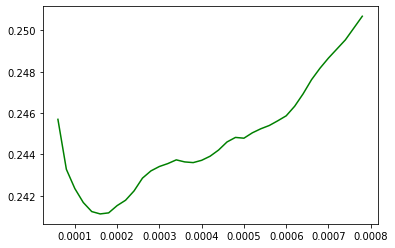

In [35]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Lasso

train_score = []
test_score = []

lambdas = []
i = 0.00006
while i <= 0.0008:
    lambdas.append(i)
    i += 0.00002

for lamb in lambdas:
    clf = Lasso(alpha = lamb, normalize=True)
    scores = cross_validate(clf, x_train, y_train, cv=5, scoring='neg_mean_absolute_error', return_train_score = True)
    #train_score.append(scores['train_score'].mean() * -1)
    test_score.append(scores['test_score'].mean() * -1)
#plt.plot(lambdas, train_score, c='r')
plt.plot(lambdas, test_score, c='g' )
plt.show()

Minimalmny błąd modelu osiągamy dla współczynnika 0.00014


In [36]:
model = Lasso(alpha = 0.00014, normalize=True)
model.fit(x_train, y_train) 
feat = {}
for i in range(len(x_train.columns)):
    feat[x_train.columns[i]] = abs(model.coef_[i])
    
print("Atrybuty wraz z ich wagami:")
for key in sorted(feat, key=feat.get, reverse=True):
    print(key, feat[key])

Atrybuty wraz z ich wagami:
('stop_bezrob_poprz', 'w %') 8.48323578166613
('attr_4', '') 2.861856351635362
('prod_sprzed_inwest', '%_poprz') 2.0801490308105235
('prod_sprzed_przetw', 'x') 1.4229437620601417
('attr_0', '') 1.4023839729322363
('attr_5', '') 1.3720410319234833
('klim_kon_trans_mag', 'x') 1.3456328892779146
('klim_kon_bud', 'x') 0.9529299112701974
('cen_odziez', '%_poprz') 0.9124869512805734
('cen_trzod', '%_poprz') 0.8202974094097415
('skup_wieprz_zyt', 'prop') 0.7047489345004592
('cen_lacznosc', '%_poprz') 0.70280825522133
('cen_uz_mieszk', '%_poprz') 0.691351862999725
('klim_kon_nieruchom', 'x') 0.6883118723719195
('cen_wypos_mieszk', '%_poprz') 0.6759309274055945
('klim_kon_hand_sam', 'x') 0.6578996611088409
('attr_2', '') 0.6390959455679474
('import_stal', '%_poprz') 0.6376967666555745
('emer_rol_nom', '%_poprz') 0.5148136540069612
('cen_rekr_kult', '%_poprz') 0.4908496917985977
('prod_sprzed_gor_wydob', '%_poprz') 0.44040919969763015
('cen_prod_energ', '%_poprz') 0.4

Pozostałe cechy, które zostaną użyte w modelu:

In [37]:
cechy = x_train.columns.values
cechy_lasso = cechy[np.where(model.coef_ != 0.)[0]]
print(cechy_lasso)

[('wyn_real', '%_poprz') ('emer_rol_nom', '%_poprz')
 ('saldo_budzet', 'mln_zl') ('cen_byd', '%_poprz')
 ('cen_trzod', '%_poprz') ('cen_mlek', '%_poprz')
 ('skup_wieprz_zyt', 'prop') ('cen_prod_energ', '%_poprz')
 ('cen_prod_bud_mon', '%_poprz') ('cen_tow_us', '%_poprz')
 ('cen_alko_tyt', '%_poprz') ('cen_odziez', '%_poprz')
 ('cen_uz_mieszk', '%_poprz') ('cen_wypos_mieszk', '%_poprz')
 ('cen_zdrowie', '%_poprz') ('cen_trans', '%_poprz')
 ('cen_lacznosc', '%_poprz') ('cen_rekr_kult', '%_poprz')
 ('cen_edu', '%_poprz') ('term_trade', '%_poprz')
 ('prod_sprzed_gor_wydob', '%_poprz') ('prod_sprzed_energ_2', '%_poprz')
 ('prod_sprzed_odpad', '%_poprz') ('prod_sprzed_inwest', '%_poprz')
 ('prod_sprzed_kon_nietrw', '%_poprz') ('zamow_przem', '%_poprz')
 ('prod_bud_mon', '%_poprz') ('mieszkania', 'szt')
 ('obroty_hand', '%_poprz') ('import_stal', '%_poprz')
 ('sald_hand_zagr', 'mln_zl') ('prod_sprzed_przetw', 'x')
 ('klim_kon_bud', 'x') ('klim_kon_hand_sam', 'x')
 ('klim_kon_trans_mag', 'x') 

Odrzuconych zostało 13 z 58 cech.

### 3.6. Regresja grzbietowa

Użyjemy regresji grzbietowej (Ridge regression), aby skorygować wagi atrybutów wybranych metodą Lasso i ograniczyć wariancję naszego modelu.

Poniżej znajduje się wykres dokładności modelu Ridge w zależności od wartości współczynnika regularyzacji.

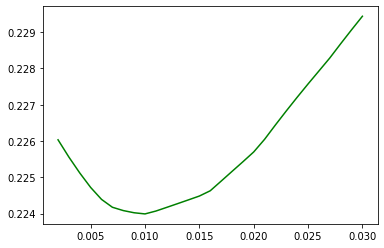

In [38]:
from sklearn.linear_model import Ridge
test_score = []

lambdas = []
i = 0.001
while i <= 0.03:
    i += 0.001
    lambdas.append(i)
    

for lamb in lambdas:
    clf = Ridge(alpha = lamb)
    scores = cross_validate(clf, x_train[cechy_lasso], y_train, cv=5, scoring='neg_mean_absolute_error', return_train_score = True)
    test_score.append(scores['test_score'].mean() * -1)
plt.plot(lambdas, test_score, c='g' )
plt.show()

Minimalmny błąd modelu osiągamy dla współczynnika 0.01

### 3.7. Ostateczny model

Tworzymy model regresji regresji grzbietowej z optymalnym wpółczynnikiem i uczymy go na cechach wybranych metodą Lasso.

In [39]:
from sklearn import metrics

clf = Ridge(alpha = 0.01)
clf.fit(x_train[cechy_lasso],y_train) 

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Sprawdzamy dokładność naszego modelu na zbiorze ucżącym i testowym.

In [40]:
y_pred_train = clf.predict(x_train[cechy_lasso])
y_pred_test = clf.predict(x_test[cechy_lasso])
e_train = metrics.mean_squared_error(y_train, y_pred_train)
e_test = metrics.mean_squared_error(y_test, y_pred_test)
print("Cechy wybrane metodą Lasso + Ridge - błąd uczenia: " + str(e_train))
print("Cechy wybrane metodą Lasso + Ridge - błąd testowania: " + str(e_test))

Cechy wybrane metodą Lasso + Ridge - błąd uczenia: 0.027528856534458763
Cechy wybrane metodą Lasso + Ridge - błąd testowania: 0.07521874149700025


## 4. Wnioski końcowe



Atrybuty, które zostały wybane przez metodę Lasso jako te o największym wpływie na stopę bezrobocia:

1. Stopa bezrobocia z poprzedniego okresu (stop_bezrob_poprz, w %) 8.48
2. Połączenie wysoko skorelowanych danych dotyczących produkcji sprzedanej (attr_4) 2.86
3. Produkcja sprzedana: dobra inwestycyjne (prod_sprzed_inwest, %_poprz) 2.08
4. Produkcja sprzedana: przetwórstwo (prod_sprzed_przetw, x) 1.42
5. Połączenie silnie skorelowanych ze sobą danych dotyczących: wynagrodzeń w sektorze przedsiębiorstw, kwot emerytur, cen importu i eksportu towarów (attr_0) 1.40







Atrybut 1. stanowi bazę do przewidywań, więc w oczywisty sposób jest on najbardziej istotny.

Atrybuty 2., 3. i 4. opisują sprzedaż, a jeśli sprzedaż jest wysoka to najczęściej oznacza to wygenerowanie dużej wartości, którą musi generować większa liczba pracowników, co oznacza niższe bezrobocie.

Atrybut 5. z kolei pokazuje kondycję gospodarki. Jeśli gospodarka jest w dobrym stanie, to najprawdopodobniej również niskie jest bezrobocie.

Średni błąd kwadratowy uzyskany na zbiorze testowym wynosi około 0.075 punktu procentowego. Biorąc pod uwagę, że na przestrzeni analizowanych lat bezrobocie zazwyczaj się mieściło w przedziale 9,6%-15,9% (kwartyl górny i dolny), uzyskany średni błąd kwadratowy stanowi około 1,2% tego przedziału, czyli model pozwala z bardzo wysoką dokładnością wyznaczyć stopę bezrobocia.